In [4]:
# Merger rate for IMRIPY system when they throw away all of the dark matter before merging.

import numpy as np
import matplotlib.pyplot as plt
import imripy
from imripy import merger_system as ms
from scipy.interpolate import interp1d
from matplotlib.ticker import FormatStrFormatter
from scipy.optimize import curve_fit
from numpy import diff
   


π = np.pi
G = 4.4959e-15            #in units of M☉^-1 pc^3 yr^-2
c = 0.3068                #in units of pc yr^-1
ρ_eq = 3.1812e3           #in units of M☉ pc^-3 with ρ_eq=2.15368e-16 kg m^-3
pc = 3.0857e16            # in meters
yr = 3.154e7              # in units of seconds
t_eq = 1.59246e12/yr      # in units of seconds
t_m = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr
t_0 = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr

σ_eq = 0.005
ρ_m = 4e19                #ρ_m = 4e19 M☉ Gpc^-3

year_to_pc = 0.3064


    

            

m_2 = np.geomspace(1e-5, 30, 30)    

m_2_list = m_2.tolist()



m_1 = 30 #in units of solar mass.

print("m_2 =", m_2_list, "M☉")

a_i = 0.01  # in units pf parsec

t_initial_merger_time = t_m





print('\v')

e0_list = np.zeros(len(m_2_list))
    
    
for i , m_2 in enumerate(m_2_list):
    def M_binary_initial(m_1, m_2):
        return (m_1 + m_2 )
    def j_initial(m_1, m_2):
        return  (((85/3) * (G**3) * m_1 * m_2 * M_binary_initial(m_1, m_2) * t_m)/((a_i**4)*(c**5)))**(1/7)
    j_i = j_initial(m_1, m_2)
    e0_list[i] = np.sqrt(1 - (j_i**2))
print("e0 =", e0_list)



m_2 = [1e-05, 1.672434079944923e-05, 2.7970357517612152e-05, 4.677857914069824e-05, 7.823408996630442e-05, 0.00013084135827312452, 0.0002188235466422568, 0.00036596795689892775, 0.0006120572832855814, 0.0010236254594453093, 0.0017119461034756133, 0.002863117006481533, 0.0047883744565096, 0.008008240628604403, 0.013393254547677542, 0.022399335346913244, 0.03746141180229261, 0.06265174178100505, 0.10478090812246206, 0.17523916167158335, 0.2930759461205335, 0.49015020030408224, 0.8197438992803774, 1.3709676339834416, 2.2928529935753605, 3.83464548675917, 6.413191796563024, 10.725640521795185, 17.937926737888514, 30.0] M☉

e0 = [0.99999986 0.99999984 0.99999981 0.99999978 0.99999975 0.99999971
 0.99999966 0.99999961 0.99999954 0.99999947 0.99999939 0.99999929
 0.99999918 0.99999905 0.9999989  0.99999873 0.99999853 0.99999829
 0.99999802 0.99999771 0.99999734 0.99999691 0.99999641 0.99999582
 0.99999512 0.99999427 0.99999323 0.9999919  0.99999017 0.99998786]


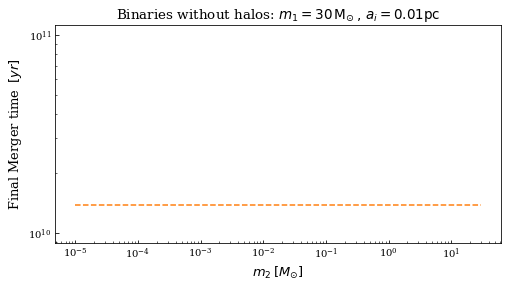

In [5]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'


def final_merger_time_nohalos(m_2):  # assuming a_i = a_f and hence j_i = j_f .
    a_f = a_i
    return (np.sqrt(a_f/a_i)) *t_initial_merger_time



final_merger_time_nohalos_list = np.zeros(len(m_2_list))

for i, m_2 in enumerate(m_2_list):
    final_merger_time_nohalos_list[i] = final_merger_time_nohalos(m_2)
    
    
plt.figure(figsize=(8,4))

plt.loglog(m_2_list, final_merger_time_nohalos_list, 'C1', linestyle = '--')



plt.xlabel('$m_{2}\:[M_{\odot}]$', fontsize = 13)
plt.ylabel('Final Merger time $\: [yr]$', fontsize = 13)
plt.title('Binaries without halos: $m_{1} = 30 \, \mathrm{M_{\odot}} \,,\, a_{i} = 0.01 \mathrm{pc}$', fontsize = 13.5)
plt.show()     

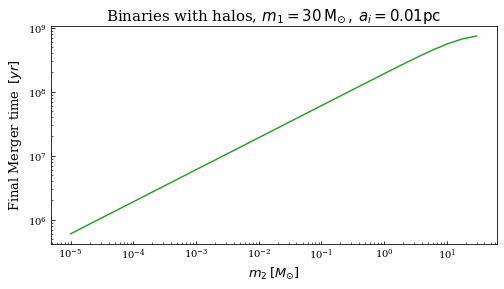

In [6]:

def final_merger_time_withhalos(m_2):  # j_f = sqrt(a_i/a_f) * j_i
    
    
    def x(m_1, m_2):  # Let a_i = (0.0977 * λ *x)
        return  (((3 * (m_1 + m_2 ) * a_i)/(8 * π * ρ_eq))**(1/4)) * ((0.0977)**(-1/4))
    
    def λ(m_1, m_2):
        return (a_i / (0.0977 * x(m_1, m_2)))
    
    
    def s(m_1, m_2): # S_dec of the binary decouple.
        return ((0.03095*λ(m_1, m_2)+ 0.3425)*λ(m_1, m_2))
    
    
    def t_dec(m_1, m_2):    # t_dec of the binary decouple.
        return ((np.sqrt(3/(8*π*G*ρ_eq)))*(((2/3)*(s(m_1, m_2)-2)*np.sqrt(s(m_1, m_2)+1))+(4/3)))
  
    
    def ρ_bar(m):
        return ((ρ_eq/2)*(t_eq**(3/2))*((2*G*m)**(3/4))) 
    
    
    
    def M_1halo(m_1, m_2):
        return (((16*π)/3)*ρ_bar(m_1)*((2*G*m_1*(t_dec(m_1, m_2)**2))**(1/4)))
    
    
    def M_2halo(m_1, m_2):
        return (((16*π)/3)*ρ_bar(m_2)*((2*G*m_2*(t_dec(m_1, m_2)**2))**(1/4)))
    

    def M_binary_initial(m_1, m_2):
        return (m_1 + m_2 + M_1halo(m_1, m_2) + M_2halo(m_1, m_2))
      
    def M_1(m_1, m_2):
        return (m_1 + M_1halo(m_1, m_2))
    
    def M_2(m_1, m_2):
        return (m_2 + M_2halo(m_1, m_2))
    
    def M_binary_final(m_1, m_2):
        return (m_1 + m_2 )
      
    
    #Schwarzchild Radius of the PBH.
    def r_s(m): 
        return ((2*G*m)/(c**2)) 


    #r_turnaround of the dark matter halos, eq.(5) in "WIMPs and stellar-mass primordial black holes are incompatible"
    def r_ta(m): 
        return ((2*G*m*(t_dec(m_1, m_2)**2))**(1/3))


    # The binding energy, E_b of the dark matter halos calculated within r_s and r_ta for dark matter halo's density profile of ρ(r)∝ r^{-9/4}
    def E_b(m): 
        return ((16*π*G*ρ_bar(m)*m*(((r_ta(m))**(-1/4))-((r_s(m))**(-1/4))))-((128/3)*G*(π**2)*(ρ_bar(m)**2)*(((r_ta(m))**(1/2))-((r_s(m))**(1/2)))))
    
    
    def a_final(m_1,m_2):
        return ((G* m_1 * m_2 * a_i)/((G * M_1(m_1, m_2) * M_2(m_1, m_2))-(2 * a_i *(E_b(m_1)+E_b(m_2)))))

    
    
    
    return   (np.sqrt(a_final(m_1, m_2)/a_i)) * t_initial_merger_time



plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'


final_merger_time_withhalos_list = np.zeros(len(m_2_list))

for i, m_2 in enumerate(m_2_list):
    final_merger_time_withhalos_list[i] = final_merger_time_withhalos(m_2)

    
    
plt.figure(figsize=(8, 4))
plt.loglog(m_2_list, final_merger_time_withhalos_list, 'C2')



plt.xlabel('$m_{2}\:[M_{\odot}]$', fontsize = 13)
plt.ylabel('Final Merger time $\: [yr]$', fontsize = 13)
plt.title('Binaries with halos, $m_{1} = 30 \, \mathrm{M_{\odot}} \, , \, a_{i} = 0.01 \mathrm{pc}$', fontsize = 15)
plt.show()     

/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/inspiral.py:534: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  t_coal = t_coal * 48./19. / g(e_0)**4 * quad(lambda e: g(e)**4 *(1-e**2)**(5./2.) /e/(1. + 121./304. * e**2), 0., e_0, limit=100)[0]   # The inspiral time according to Maggiore (2007)


Evolving from  1157407407.4074075  to  1.0 r_isco  with initial eccentricity 0.9999998595470696  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08


/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/inspiral.py:153: RuntimeWarning: invalid value encountered in double_scalars
  return -32./5. * sp.m_reduced(a)**2 * sp.m_total(a)**3 / a**5  / (1. - e**2)**(7./2.) * (1. + 73./24. * e**2 + 37./96. * e**4)
/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/inspiral.py:337: RuntimeWarning: invalid value encountered in double_scalars
  return -(1.-e**2)**(3./2.)/2./np.pi * quad(integrand, 0., 2.*np.pi, limit = 100)[0]
/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/inspiral.py:335: RuntimeWarning: invalid value encountered in sqrt
  v_s = np.sqrt(sp.m_total(a) *(2./r - 1./a))
/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/halo.py:321: RuntimeWarning: invalid value encountered in double_scalars
  return np.where(r > self.r_min, self.rho_spike * (self.r_spike/r)**self.alpha, 0.)
/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/inspiral.py:337: IntegrationWarning: The occurrence of roundoff error is de

A termination event occurred.
 -> Evolution took 4.1554s
Evolving from  1157407407.4074075  to  1.0 r_isco  with initial eccentricity 0.9999998373160007  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
A termination event occurred.
 -> Evolution took 4.0470s
Evolving from  1157407407.4074075  to  1.0 r_isco  with initial eccentricity 0.9999998115661617  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
A termination event occurred.
 -> Evolution took 3.1725s
Evolving from  1157407407.4074075  to  1.0 r_isco  with initial eccentricity 0.9999997817405877  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08


/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/inspiral.py:172: RuntimeWarning: invalid value encountered in double_scalars
  return -32./5. * sp.m_reduced(a)**2 * sp.m_total(a)**(5./2.) / a**(7./2.)  / (1. - e**2)**2 * (1. + 7./8.*e**2)


A termination event occurred.
 -> Evolution took 2.4552s
Evolving from  1157407407.4074075  to  1.0 r_isco  with initial eccentricity 0.9999997471941487  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
A termination event occurred.
 -> Evolution took 2.4379s
Evolving from  1157407407.4074075  to  1.0 r_isco  with initial eccentricity 0.999999707179586  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
A termination event occurred.
 -> Evolution took 2.4361s
Evolving from  1157407407.4074075  to  1.0 r_isco  with initial eccentricity 0.9999996608313313  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
A termination event occurred.
 -> Evolution took 2.4965s
Evolving from  1157407407.4074075  to  1.0 r_isco  with initial eccentricity 0.9999996071467507  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
A termination event occurred.
 ->

/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/inspiral.py:361: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return -(1.-e**2)**(3./2.)/2./np.pi *np.sqrt(sp.m_total(a) * a*(1.-e**2)) *  quad(integrand, 0., 2.*np.pi, limit = 100)[0]


A termination event occurred.
 -> Evolution took 3.0787s
Evolving from  1157407407.4074075  to  1.0 r_isco  with initial eccentricity 0.9999942745732785  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
A termination event occurred.
 -> Evolution took 10.3598s
Evolving from  1157407407.4074075  to  1.0 r_isco  with initial eccentricity 0.9999932277099096  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
A termination event occurred.
 -> Evolution took 144.9366s
Evolving from  1157407407.4074075  to  1.0 r_isco  with initial eccentricity 0.9999919008735588  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08


/home/pratibhajangra/Desktop/Work/imripy-main/src/imripy/inspiral.py:361: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return -(1.-e**2)**(3./2.)/2./np.pi *np.sqrt(sp.m_total(a) * a*(1.-e**2)) *  quad(integrand, 0., 2.*np.pi, limit = 100)[0]


A termination event occurred.
 -> Evolution took 209.4907s
Evolving from  1157407407.4074075  to  1.0 r_isco  with initial eccentricity 0.9999901715651331  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
The solver successfully reached the end of the integration interval.
 -> Evolution took 0.1321s
Evolving from  1157407407.4074075  to  1.0 r_isco  with initial eccentricity 0.9999901715651331  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
A termination event occurred.
 -> Evolution took 193.5379s
Evolving from  1157407407.4074075  to  1.0 r_isco  with initial eccentricity 0.9999878619754459  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
The solver successfully reached the end of the integration interval.
 -> Evolution took 0.0137s
Evolving from  1157407407.4074075  to  1.0 r_isco  with initial eccentricity 0.9999878619754459  with  Options: accretion = False, halo

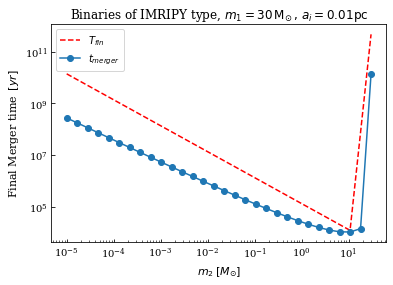

In [7]:
m_2 = np.geomspace(1e-5, 30, 30)    

m_2_list = m_2.tolist()



tm_list = np.zeros(len(m_2_list))
T_list = np.zeros(len(m_2_list))



for i, m_2 in enumerate(m_2_list):
    m_bar = m_1
    M_1 =  m_1 * ms.solar_mass_to_pc  
    M_2 =  m_2 * ms.solar_mass_to_pc 
    
    
    D_luminosity = 5e8              
    ρ_bar = (ρ_eq/2) * (t_eq**(3/2)) * ((2 * G * m_bar)**(3/4))   
    r_spike = 1      # in parsecs, Choosen by choice
    alpha = 9/4
    rho_spike =  ρ_bar * (r_spike**(-alpha)) * ms.solar_mass_to_pc  
    spike = imripy.halo.Spike(rho_spike, r_spike, alpha)
    
    sp = ms.SystemProp(M_1, M_2, spike, D_luminosity)
    a_fin = sp.r_isco()      # Choosen equal to r_icso
    R_fin = sp.r_isco()      # The final condition for the evolution
    
    def M_binary_initial(m_1, m_2):
        return (m_1 + m_2 )
      
    def j_initial(m_1, m_2):
        return  (((85/3) * (G**3) * m_1 * m_2 * M_binary_initial(m_1, m_2) * t_m)/((a_i**4)*(c**5)))**(1/7)
    j_i = j_initial(m_1, m_2)
    e0  = np.sqrt(1 - (j_i **2))
    
    
    
    m_2_ref = 1 # in units of solar mass
    T = 1e-5 * (t_m * ms.year_to_pc ) * ((m_2/m_2_ref)**(-1))
    T_list[i] =  T/ms.year_to_pc
    
    ev_ecc = imripy.inspiral.Classic.Evolve(sp, a_i, e0,  a_fin = R_fin, t_fin = T)
    tm = ev_ecc.t[-1]
    tm_list[i] = tm/ms.year_to_pc
    
      
    
    while np.isclose(T_list[i], tm_list[i]) == True: 
        T_list[i] = T_list[i] * 1e4
        ev_ecc = imripy.inspiral.Classic.Evolve(sp, a_i, e0,  a_fin = R_fin, t_fin = T_list[i]*ms.year_to_pc)
        tm_list[i] = ev_ecc.t[-1]/ms.year_to_pc
        
            
    
    
    
    
print("T_list =", T_list, "yr")  
print("tm_list =", tm_list, "yr")
        

    
    
plt.loglog(m_2_list, T_list, '--r')     
plt.loglog(m_2_list, tm_list, '-o')
   

plt.legend(["$T_{fin}$","$t_{merger}$"])
    

plt.xlabel('$m_{2}\:[M_{\odot}]$', fontsize = 11)
plt.ylabel('Final Merger time $\: [yr]$', fontsize = 11)
plt.title('Binaries of IMRIPY type, $m_{1} = 30 \, \mathrm{M_{\odot}} \, , \, a_{i} = 0.01 \mathrm{pc}$', fontsize = 12)
plt.savefig('tm_imripy.pdf', bbox_inches='tight')
plt.show()     


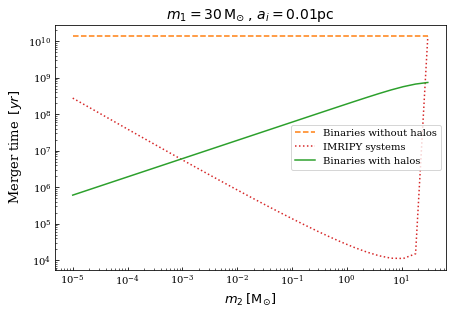

In [8]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.figure(figsize=(7,4.5))


plt.loglog(m_2_list, final_merger_time_nohalos_list, 'C1--')
plt.loglog(m_2_list, tm_list, 'C3:')
plt.loglog(m_2_list, final_merger_time_withhalos_list, 'C2')



plt.legend(["Binaries without halos",  "IMRIPY systems", "Binaries with halos"], loc = 'center right')
plt.xlabel('$m_{2}\:[\mathrm{M_{\odot}}]$', fontsize = 13)
plt.ylabel('Merger time $\: [yr]$', fontsize = 13)
plt.title('$m_{1} = 30 \, \mathrm{M_{\odot}} \: , \,  a_{i} = 0.01 \mathrm{pc}$', fontsize = 14)
plt.savefig('mergertime.pdf', bbox_inches = 'tight')
plt.show()  

In [8]:
np.log(3e5/1e4)/np.log(4e-3/5)

-0.4769661528798899

In [17]:
1/30

0.03333333333333333